In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

## 데이터 합체

In [25]:
galton = pd.read_csv("/content/drive/MyDrive/한양대/데베응용-오성팀/코랩 노트북/data/Galtons_Height_Data_898.csv")
fam_height = pd.read_csv("/content/drive/MyDrive/한양대/데베응용-오성팀/코랩 노트북/data/My_Family_Height_Data_67.csv")
ohsung_data = pd.read_csv("/content/drive/MyDrive/한양대/데베응용-오성팀/코랩 노트북/data/output_2_23.csv")

height_data = pd.concat([galton, fam_height, ohsung_data], ignore_index=True)
height_data.head()

,Family,Father,Mother,Gender,Height,Kids,Father(cm),mother(cm),Height(cm)
0,1,78.5,67.0,M,73.2,4,199.39,170.18,185.928
1,1,78.5,67.0,F,69.2,4,199.39,170.18,175.768
2,1,78.5,67.0,F,69.0,4,199.39,170.18,175.260
3,1,78.5,67.0,F,69.0,4,199.39,170.18,175.260
4,2,75.5,66.5,M,73.5,4,191.77,168.91,186.690


In [26]:
height_data.shape

(1159, 9)

## 데이터 분석

In [ ]:
height_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Family      1159 non-null   int64  
 1   Father      1159 non-null   float64
 2   Mother      1159 non-null   float64
 3   Gender      1159 non-null   object 
 4   Height      1159 non-null   float64
 5   Kids        1159 non-null   int64  
 6   Father(cm)  1159 non-null   float64
 7   mother(cm)  1159 non-null   float64
 8   Height(cm)  1159 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 81.6+ KB


In [28]:
height_data.describe()

,Family,Father,Mother,Height,Kids,Father(cm),mother(cm),Height(cm)
count,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000
mean,90.947368,68.944521,63.868766,66.741242,5.255393,175.123412,162.225291,169.522575
std,58.562838,2.420523,2.275990,3.523853,2.891893,6.138895,5.778950,8.949975
min,1.000000,62.000000,56.400000,56.000000,1.000000,157.480000,143.200000,142.240000
25%,40.000000,67.300000,62.500000,64.000000,3.000000,171.000000,158.750000,162.560000
50%,83.000000,69.000000,64.000000,66.700000,5.000000,175.260000,162.560000,169.418000
75%,139.500000,70.500000,65.100000,69.500000,7.000000,179.070000,165.300000,176.530000
max,205.000000,78.500000,70.500000,79.000000,15.000000,199.390000,179.070000,200.660000


In [5]:
height_data = height_data.drop(['Family', 'Father', 'Mother', 'Height'], axis=1)
height_data

,Gender,Kids,Father(cm),mother(cm),Height(cm)
0,M,4,199.39,170.18,185.928
1,F,4,199.39,170.18,175.768
2,F,4,199.39,170.18,175.260
3,F,4,199.39,170.18,175.260
4,M,4,191.77,168.91,186.690
...,...,...,...,...,...
1154,M,2,173.00,160.00,172.000
1155,F,2,173.00,160.00,158.000
1156,F,2,179.00,163.00,166.500
1157,M,2,179.00,163.00,182.000


### Gender 항목을 Numeric variable로 치환

In [36]:
gender = pd.get_dummies(height_data.Gender)
height_data = pd.concat([gender, height_data], axis=1)
height_data = height_data.drop(['Gender'], axis=1)
height_data

,F,M,Family,Father,Mother,Height,Kids,Father(cm),mother(cm),Height(cm)
0,0,1,1,78.5,67.0,73.2,4,199.39,170.18,185.928
1,1,0,1,78.5,67.0,69.2,4,199.39,170.18,175.768
2,1,0,1,78.5,67.0,69.0,4,199.39,170.18,175.260
3,1,0,1,78.5,67.0,69.0,4,199.39,170.18,175.260
4,0,1,2,75.5,66.5,73.5,4,191.77,168.91,186.690
...,...,...,...,...,...,...,...,...,...,...
1154,0,1,97,68.1,63.0,67.7,2,173.00,160.00,172.000
1155,1,0,97,68.1,63.0,62.2,2,173.00,160.00,158.000
1156,1,0,98,70.5,64.2,65.6,2,179.00,163.00,166.500
1157,0,1,98,70.5,64.2,71.7,2,179.00,163.00,182.000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
corr = height_data.corr()
corr['Height(cm)']

F            -0.724859
M             0.724859
Kids         -0.093342
Father(cm)    0.250057
mother(cm)    0.224323
Height(cm)    1.000000
Name: Height(cm), dtype: float64

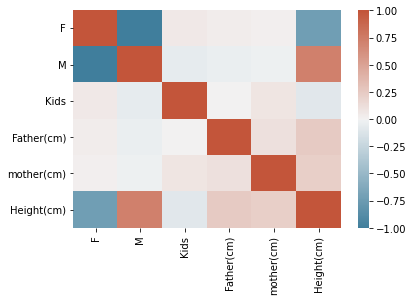

In [ ]:
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True))

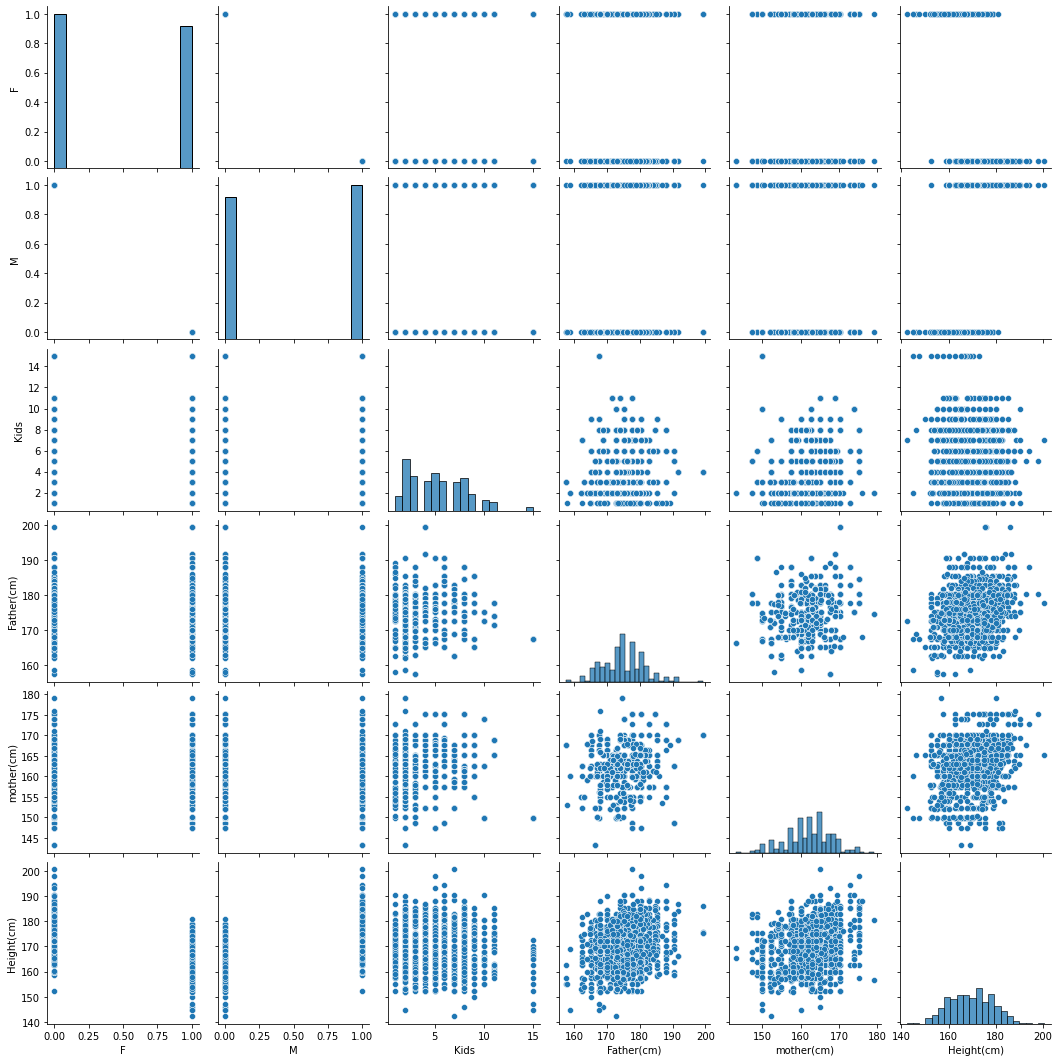

In [ ]:
sns.pairplot(height_data)

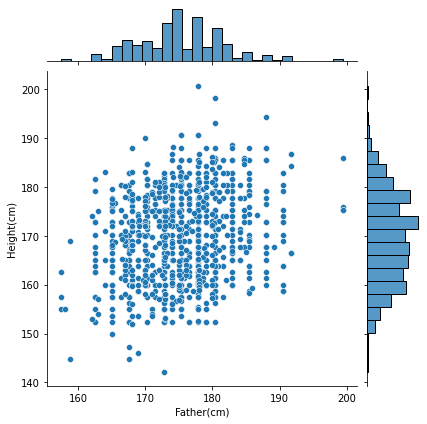

In [ ]:
sns.jointplot(x='Father(cm)', y='Height(cm)', data=height_data)

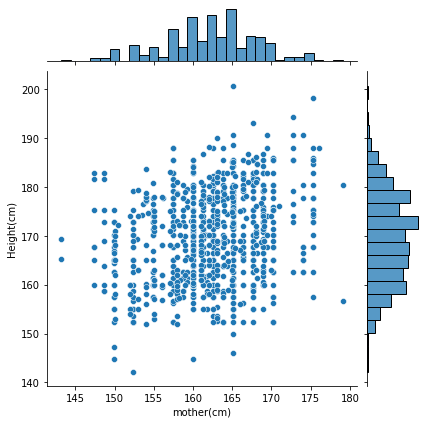

In [ ]:
sns.jointplot(x='mother(cm)', y='Height(cm)', data=height_data)

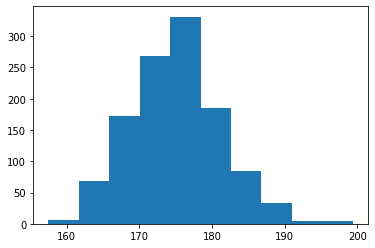

In [ ]:
plt.hist(height_data['Father(cm)'])
plt.show()

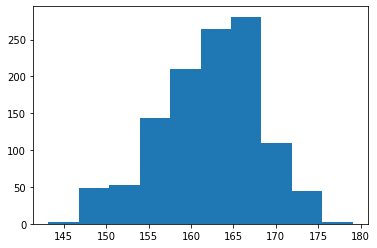

In [ ]:
plt.hist(height_data['mother(cm)'])
plt.show()

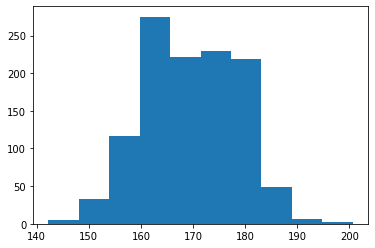

In [ ]:
plt.hist(height_data['Height(cm)'])
plt.show()

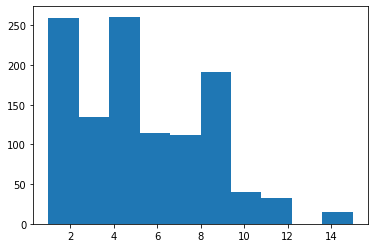

In [ ]:
plt.hist(height_data['Kids'])
plt.show()

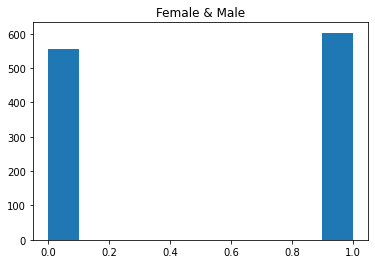

In [ ]:
plt.hist(height_data['M'])
plt.title('Female & Male')
plt.show()

## 독립변수 종속변수 분리

In [37]:
X = pd.DataFrame(height_data.iloc[:,:5])
Y = pd.DataFrame(height_data['Height(cm)'])

In [38]:
X

,F,M,Family,Father,Mother
0,0,1,1,78.5,67.0
1,1,0,1,78.5,67.0
2,1,0,1,78.5,67.0
3,1,0,1,78.5,67.0
4,0,1,2,75.5,66.5
...,...,...,...,...,...
1154,0,1,97,68.1,63.0
1155,1,0,97,68.1,63.0
1156,1,0,98,70.5,64.2
1157,0,1,98,70.5,64.2


In [39]:
Y

,Height(cm)
0,185.928
1,175.768
2,175.260
3,175.260
4,186.690
...,...
1154,172.000
1155,158.000
1156,166.500
1157,182.000


## Train Test split

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Ridge

In [41]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [42]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 3, 10, 50, 100]

In [43]:
for a in alphas:
    model = Ridge(alpha=a).fit(X_train, Y_train)
    score = model.score(X_train, Y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(Y_train, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.4f}, MSE:{2:.4f}, RMSE:{3:.4f}".format(a, score, mse, np.sqrt(mse)))

ridge_cv = RidgeCV(alphas=alphas, cv=5)
model = ridge_cv.fit(X_train, Y_train)
print(model.alpha_)

Alpha:0.0001, R2:0.6604, MSE:27.5741, RMSE:5.2511
Alpha:0.0010, R2:0.6604, MSE:27.5741, RMSE:5.2511
Alpha:0.0100, R2:0.6604, MSE:27.5741, RMSE:5.2511
Alpha:0.1000, R2:0.6604, MSE:27.5741, RMSE:5.2511
Alpha:0.3000, R2:0.6604, MSE:27.5741, RMSE:5.2511
Alpha:0.5000, R2:0.6604, MSE:27.5741, RMSE:5.2511
Alpha:0.7000, R2:0.6604, MSE:27.5742, RMSE:5.2511
Alpha:1.0000, R2:0.6604, MSE:27.5743, RMSE:5.2511
Alpha:3.0000, R2:0.6603, MSE:27.5759, RMSE:5.2513
Alpha:10.0000, R2:0.6601, MSE:27.5936, RMSE:5.2530
Alpha:50.0000, R2:0.6552, MSE:27.9892, RMSE:5.2905
Alpha:100.0000, R2:0.6434, MSE:28.9530, RMSE:5.3808
0.0001


In [ ]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
model = ridge_cv.fit(X_train, Y_train)
print(model.alpha_)

0.0001


In [ ]:
model_ridge = Ridge(alpha=0.0001).fit(X_train, Y_train)
y_pred_ridge = model_ridge.predict(X_test)
score_ridge = model_ridge.score(X_test, Y_test)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

Final Result: Ridge R2:0.597, MSE:30.27, RMSE:5.50


## Lasso

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
for a in alphas:
    model = Lasso(alpha=a).fit(X_train, Y_train)
    score = model.score(X_train, Y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(Y_train, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

lasso_cv = LassoCV(alphas=alphas, cv=5)
model = lasso_cv.fit(X_train, Y_train)
print(model.alpha_)

Alpha:0.0001, R2:0.66, MSE:27.69, RMSE:5.26
Alpha:0.0010, R2:0.66, MSE:27.69, RMSE:5.26
Alpha:0.0100, R2:0.66, MSE:27.69, RMSE:5.26
Alpha:0.1000, R2:0.66, MSE:27.73, RMSE:5.27
Alpha:0.3000, R2:0.65, MSE:28.06, RMSE:5.30
Alpha:0.5000, R2:0.65, MSE:28.72, RMSE:5.36
Alpha:0.7000, R2:0.63, MSE:29.71, RMSE:5.45
Alpha:1.0000, R2:0.61, MSE:31.82, RMSE:5.64
Alpha:3.0000, R2:0.20, MSE:64.85, RMSE:8.05
Alpha:10.0000, R2:0.06, MSE:76.53, RMSE:8.75
Alpha:50.0000, R2:0.00, MSE:81.19, RMSE:9.01
Alpha:100.0000, R2:0.00, MSE:81.19, RMSE:9.01


In [ ]:
lasso_cv = LassoCV(alphas=alphas, cv=5)
model = lasso_cv.fit(X_train, Y_train)
print(model.alpha_)

0.0001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model_lasso = Lasso(alpha=0.0001).fit(X_train, Y_train)
y_pred_lasso = model_lasso.predict(X_test)
score_lasso = model_lasso.score(X_test, Y_test)
mse_lasso = mean_squared_error(Y_test, y_pred_ridge)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score_lasso, mse_lasso, np.sqrt(mse_lasso)))

Final Result: Ridge R2:0.597, MSE:30.27, RMSE:5.50


## Elastic

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train, Y_train)
    score = model.score(X_train, Y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(Y_train, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, Y_train)

Alpha:0.0001, R2:0.66, MSE:27.69, RMSE:5.26
Alpha:0.0010, R2:0.66, MSE:27.69, RMSE:5.26
Alpha:0.0100, R2:0.66, MSE:27.69, RMSE:5.26
Alpha:0.1000, R2:0.65, MSE:28.16, RMSE:5.31
Alpha:0.3000, R2:0.62, MSE:30.74, RMSE:5.54
Alpha:0.5000, R2:0.58, MSE:34.05, RMSE:5.84
Alpha:0.7000, R2:0.54, MSE:37.40, RMSE:6.12
Alpha:1.0000, R2:0.48, MSE:42.01, RMSE:6.48
Alpha:3.0000, R2:0.26, MSE:60.24, RMSE:7.76
Alpha:10.0000, R2:0.10, MSE:73.35, RMSE:8.56
Alpha:50.0000, R2:0.00, MSE:81.19, RMSE:9.01
Alpha:100.0000, R2:0.00, MSE:81.19, RMSE:9.01


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.752e+03, tolerance: 7.526e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, Y_train)
print(model.alpha_)

0.0001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.752e+03, tolerance: 7.526e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
model_elastic = ElasticNet(alpha=0.0001).fit(X_train, Y_train)
y_pred_elastic = model_elastic.predict(X_test)
score_elastic = model_elastic.score(X_test, Y_test)
mse_elastic = mean_squared_error(Y_test, y_pred_ridge)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score_elastic, mse_elastic, np.sqrt(mse_elastic)))

Final Result: Ridge R2:0.597, MSE:30.27, RMSE:5.50


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.752e+03, tolerance: 7.526e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
